In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import make_regression

In [5]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=1)
X
y

array([ 132.37215182, -124.89350054,  -19.68640447,  -61.22544692,
         66.32422954,  -70.98138724,  -88.08815608,   54.65827089,
        -43.22401892,  -46.89207436,  -22.23183146,  -69.6965042 ,
         97.76851004,   90.97512198,  100.05355066,  -76.80052704,
        -80.97645062,   68.2612203 ,   47.76960019, -124.47497064,
         26.10492128, -237.73991975,   50.56355217,  -90.16039317,
        -20.55465253,   58.13120765,  -42.39906346,  108.86667194,
         33.05834593,   90.74618298,  -95.44423162, -121.37601081,
         71.3761897 ,  172.7133431 ,   27.52101311,   62.17155257,
       -172.85314986,   16.86168994,  -52.89701657,   70.95622418,
         51.089916  ,  -81.03555769,  130.3852047 ,   72.22685671,
         74.13812456,  -89.09348867,   69.72230117,   -7.1019825 ,
        -35.75357981,  -71.79149412,   52.74043646,  -36.05948501,
         48.75357903, -103.99866073,  -69.51562818,  128.83926948,
         22.95520143,  -89.0983671 ,   31.19931721,   25.66660

<AxesSubplot: xlabel='0', ylabel='1'>

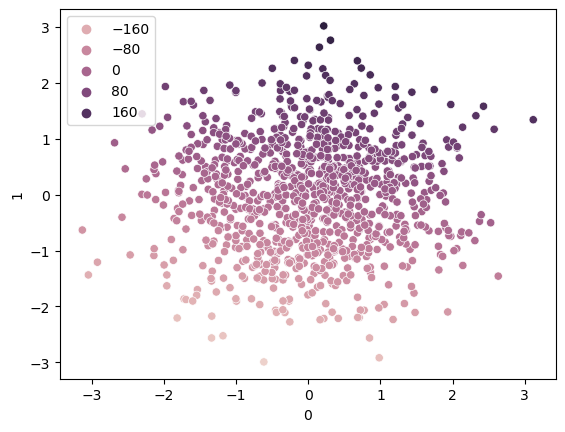

In [6]:
pd.DataFrame(X)[0]
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [8]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')

In [9]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [10]:
svr.coef_

array([[19.31651604, 74.94223119]])

In [11]:
y_pred=svr.predict(X_test)
y_pred

array([   8.07609867,   32.09776777,  -61.39835239,    9.1797555 ,
         28.16863244,   40.06996362,  -24.54605074, -106.57119289,
        -69.72694974,   36.81101642,   -1.38102911,   15.25017672,
         45.50054021, -104.88120375,  -99.44092879,   35.23650427,
        -45.8233811 ,   54.32365619,  -51.74419486,  -71.98117243,
         77.69125483, -129.36548417,   58.41692085,   74.10477251,
       -188.61708428,  -79.10474638,  -37.55848599,   57.51488177,
        -72.44427014,   17.1108339 ,  174.70841452,  -52.31804681,
         82.6108364 ,   13.53978447,  -71.73839236,   38.04597049,
        -35.67270487,  -50.01997338,   84.78264001,   26.31344444,
        -80.77774955,   17.33280796,  -92.57435221,  164.660044  ,
        -39.96750035,   65.98053701,   -6.19241468,   88.22226448,
        -57.06999272, -106.97964212,  107.6232557 ,  114.25883541,
          7.66618681, -164.32318125, -106.74543069,  102.39338158,
         -3.19150766,    8.45500841,   10.18320207,   50.63897

In [12]:
from sklearn.metrics import r2_score
print(r2_score(y_pred,y_test))

0.9998135666189583


In [13]:
#hypermeter tuning

In [14]:
params={'C':[0.1,1,10,100,1000],
       'gamma':[1,0.1,0.01,0.001,0.0001],
       'kernel':['linear'],
       'epsilon':[0.1,0.2,0.3]}

In [15]:
from sklearn.model_selection import GridSearchCV
GridSearch=GridSearchCV(SVR(),param_grid=params,scoring='neg_mean_squared_error',refit=True,cv=5,verbose=3)

In [16]:
GridSearch.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-1159.684 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-836.796 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-831.518 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-992.668 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-697.475 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1159.684 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-836.796 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-831.518 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-992.668 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-697.475 total time=   0.0s
[CV 1/

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error', verbose=3)

In [18]:
GridSearch.best_params_

{'C': 1000, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [19]:
y_pred=GridSearch.predict(X_test)
print(r2_score(y_pred,y_test))

0.9998162350471481
